In [1]:
!pip install umap-learn
!pip install hdbscan
!pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from tqdm import tqdm
import h3
import folium
from shapely.geometry import Polygon
tqdm.pandas()
%matplotlib inline

/root/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
%%time
df_=pd.read_parquet('df2_.parquet', engine='pyarrow')
df_

CPU times: user 6.98 s, sys: 2.29 s, total: 9.26 s
Wall time: 3.1 s


hexagon  rains_1  rains_2  rains_3  rains_4  rains_5  \
0        8a2d746c1b07fff    65535    65535    65535    65535    65535   
1        8a2d746c1b17fff    65535    65535    65535    65535    65535   
2        8a2d746c1b0ffff    65535    65535    65535    65535    65535   
3        8a2d746c1b0ffff    65535    65535    65535    65535    65535   
4        8a2d746c1b1ffff    65535    65535    65535    65535    65535   
...                  ...      ...      ...      ...      ...      ...   
5017569  8a2d515208e7fff      167      115      108      109       97   
5017570  8a2d515208f7fff      167      115      108      109       97   
5017571  8a2d5152088ffff      167      115      108      109       97   
5017572  8a2d515208c7fff      167      115      108      109       97   
5017573  8a2d515208c7fff      167      115      108      109       97   

         rains_6  rains_7  rains_8  rains_9  ...  heights  texture  \
0          65535    65535    65535    65535  ...    270.0        0   
1          65535    65535    65535    65535  ...     90.0        0   
2          65535    65535    65535    65535  ...    315.0        0   
3          65535    65535    65535    65535  ...    180.0        0   
4          65535    65535    65535    65535  ... -99999.0        0   
...          ...      ...      ...      ...  ...      ...      ...   
5017569      100      106      121      133  ...    180.0        6   
5017570      100      106      121      133  ...    360.0        6   
5017571      100      106      121      133  ...    360.0        6   
5017572      100      106      121      133  ... -99999.0        6   
5017573      100      106      121      133  ...    180.0        6   

         sunny_days          tavg        tmin        tmax             h3-9  \
0               131 -2.147484e+09 -2147483647 -2147483647  892d746c1b3ffff   
1               131 -2.147484e+09 -2147483647 -2147483647  892d746c1b3ffff   
2               131 -2.147484e+09 -2147483647 -2147483647  892d746c1b3ffff   
3               131 -2.147484e+09 -2147483647 -2147483647  892d746c1b3ffff   
4               131 -2.147484e+09 -2147483647 -2147483647  892d746c1b3ffff   
...             ...           ...         ...         ...              ...   
5017569         164  1.325000e+02           1         272  892d515208fffff   
5017570         164  1.325000e+02           1         272  892d515208fffff   
5017571         164  1.325000e+02           1         272  892d515208bffff   
5017572         164  1.325833e+02           1         272  892d515208fffff   
5017573         164  1.325000e+02           1         272  892d515208fffff   

                    h3-8             h3-7             h3-6  
0        882d746c1bfffff  872d746c1ffffff  862d746c7ffffff  
1        882d746c1bfffff  872d746c1ffffff  862d746c7ffffff  
2        882d746c1bfffff  872d746c1ffffff  862d746c7ffffff  
3        882d746c1bfffff  872d746c1ffffff  862d746c7ffffff  
4        882d746c1bfffff  872d746c1ffffff  862d746c7ffffff  
...                  ...              ...              ...  
5017569  882d515209fffff  872d51520ffffff  862d51527ffffff  
5017570  882d515209fffff  872d51520ffffff  862d51527ffffff  
5017571  882d515209fffff  872d51520ffffff  862d51527ffffff  
5017572  882d515209fffff  872d51520ffffff  862d51527ffffff  
5017573  882d515209fffff  872d51520ffffff  862d51527ffffff  

[5017574 rows x 23 columns]

In [4]:
%%time
df=pd.read_parquet('df2.parquet', engine='pyarrow')
df

CPU times: user 6.61 s, sys: 2.57 s, total: 9.18 s
Wall time: 2.86 s


rains_1  rains_2  rains_3  rains_4  rains_5  rains_6  rains_7  \
0          65535    65535    65535    65535    65535    65535    65535   
1          65535    65535    65535    65535    65535    65535    65535   
2          65535    65535    65535    65535    65535    65535    65535   
3          65535    65535    65535    65535    65535    65535    65535   
4          65535    65535    65535    65535    65535    65535    65535   
...          ...      ...      ...      ...      ...      ...      ...   
5017569      167      115      108      109       97      100      106   
5017570      167      115      108      109       97      100      106   
5017571      167      115      108      109       97      100      106   
5017572      167      115      108      109       97      100      106   
5017573      167      115      108      109       97      100      106   

         rains_8  rains_9  rains_10  ...  vineyards  sunny_days          tavg  \
0          65535    65535     65535  ...          0         131 -2.147484e+09   
1          65535    65535     65535  ...          0         131 -2.147484e+09   
2          65535    65535     65535  ...          0         131 -2.147484e+09   
3          65535    65535     65535  ...          0         131 -2.147484e+09   
4          65535    65535     65535  ...          0         131 -2.147484e+09   
...          ...      ...       ...  ...        ...         ...           ...   
5017569      121      133       164  ...          0         164  1.325000e+02   
5017570      121      133       164  ...          0         164  1.325000e+02   
5017571      121      133       164  ...          0         164  1.325000e+02   
5017572      121      133       164  ...          0         164  1.325833e+02   
5017573      121      133       164  ...          0         164  1.325000e+02   

               tmin        tmax          hexagon             h3-9  \
0       -2147483647 -2147483647  8a2d71b536e7fff  892d71b536fffff   
1       -2147483647 -2147483647  8a2d71b536effff  892d71b536fffff   
2       -2147483647 -2147483647  8a2d71b5361ffff  892d71b5363ffff   
3       -2147483647 -2147483647  8a2d71b536e7fff  892d71b536fffff   
4       -2147483647 -2147483647  8a2d71b536c7fff  892d71b536fffff   
...             ...         ...              ...              ...   
5017569           1         272  8a2d56025da7fff  892d56025dbffff   
5017570           1         272  8a2d56025d87fff  892d56025dbffff   
5017571           1         272  8a2d56025d8ffff  892d56025dbffff   
5017572           1         272  8a2d56025db7fff  892d56025dbffff   
5017573           1         272  8a2d56025d97fff  892d56025dbffff   

                    h3-8             h3-7             h3-6  
0        882d71b537fffff  872d71b53ffffff  862d71b57ffffff  
1        882d71b537fffff  872d71b53ffffff  862d71b57ffffff  
2        882d71b537fffff  872d71b53ffffff  862d71b57ffffff  
3        882d71b537fffff  872d71b53ffffff  862d71b57ffffff  
4        882d71b537fffff  872d71b53ffffff  862d71b57ffffff  
...                  ...              ...              ...  
5017569  882d56025dfffff  872d56025ffffff  862d56027ffffff  
5017570  882d56025dfffff  872d56025ffffff  862d56027ffffff  
5017571  882d56025dfffff  872d56025ffffff  862d56027ffffff  
5017572  882d56025dfffff  872d56025ffffff  862d56027ffffff  
5017573  882d56025dfffff  872d56025ffffff  862d56027ffffff  

[5017574 rows x 24 columns]

In [5]:
df_[['hexagon','h3-9','h3-8','h3-7','h3-6']]=df[['hexagon','h3-9','h3-8','h3-7','h3-6']]
df=df_


In [6]:
df.columns

Index(['hexagon', 'rains_1', 'rains_2', 'rains_3', 'rains_4', 'rains_5',
       'rains_6', 'rains_7', 'rains_8', 'rains_9', 'rains_10', 'rains_11',
       'rains_12', 'heights', 'texture', 'sunny_days', 'tavg', 'tmin', 'tmax',
       'h3-9', 'h3-8', 'h3-7', 'h3-6'],
      dtype='object')

In [7]:
#!pip install yandex_geocoder


In [8]:
df6=df.groupby(['h3-6']).max()
df7=df.groupby(['h3-7']).max()
df8=df.groupby(['h3-8']).max()
df9=df.groupby(['h3-9']).max()

In [9]:
df8

hexagon  rains_1  rains_2  rains_3  rains_4  rains_5  \
h3-8                                                                            
882d09248bfffff  8a2d09248b4ffff      176      121      107      102       89   
882d0924b1fffff  8a2d0924b0b7fff      173      119      106      102       85   
882d0924b9fffff  8a2d0924b84ffff      174      120      107      102       87   
882d0924bbfffff  8a2d0924baf7fff      175      120      107      102       88   
882d092691fffff  8a2d092690effff      171      118      105       99       83   
...                          ...      ...      ...      ...      ...      ...   
882d76af65fffff  8a2d76af65affff       36       32       32       30       32   
882d76af67fffff  8a2d76af67b7fff       36       32       32       31       32   
882d76af69fffff  8a2d76af69b7fff       35       31       30       30       31   
882d76af6bfffff  8a2d76af6bb7fff       35       32       30       31       31   
882d76af6dfffff  8a2d76af6daffff       35       31       31       30       31   

                 rains_6  rains_7  rains_8  rains_9  ...  rains_12  \
h3-8                                                 ...             
882d09248bfffff       94       92      111      121  ...       213   
882d0924b1fffff       93       93      111      120  ...       208   
882d0924b9fffff       94       93      112      121  ...       210   
882d0924bbfffff       95       94      113      122  ...       211   
882d092691fffff       91       88      109      118  ...       208   
...                  ...      ...      ...      ...  ...       ...   
882d76af65fffff       43       33       37       33  ...        45   
882d76af67fffff       43       33       37       34  ...        46   
882d76af69fffff       43       32       37       33  ...        45   
882d76af6bfffff       43       33       37       33  ...        45   
882d76af6dfffff       43       33       37       33  ...        45   

                    heights  texture  sunny_days        tavg  tmin  tmax  \
h3-8                                                                       
882d09248bfffff  131.987213        6         149  133.500000    19   268   
882d0924b1fffff  303.310638        6         149  137.666667    23   273   
882d0924b9fffff  174.472458        6         148  135.666667    20   270   
882d0924bbfffff  259.695160        6         148  136.166667    21   271   
882d092691fffff  225.000000        6         145  135.750000    18   273   
...                     ...      ...         ...         ...   ...   ...   
882d76af65fffff  333.434937        6         158  115.750000   -22   279   
882d76af67fffff  296.565063        6         158  115.416667   -22   278   
882d76af69fffff  360.000000        6         158  116.166667   -22   279   
882d76af6bfffff  333.434937        6         158  116.416667   -22   279   
882d76af6dfffff  360.000000        6         158  115.833333   -22   279   

                            h3-9             h3-7             h3-6  
h3-8                                                                
882d09248bfffff  892d09248b7ffff  872d09248ffffff  862d0924fffffff  
882d0924b1fffff  892d0924b0bffff  872d0924bffffff  862d0924fffffff  
882d0924b9fffff  892d0924b87ffff  872d0924bffffff  862d0924fffffff  
882d0924bbfffff  892d0924bafffff  872d0924bffffff  862d0924fffffff  
882d092691fffff  892d092690fffff  872d09269ffffff  862d0926fffffff  
...                          ...              ...              ...  
882d76af65fffff  892d76af65bffff  872d76af6ffffff  862d76af7ffffff  
882d76af67fffff  892d76af67bffff  872d76af6ffffff  862d76af7ffffff  
882d76af69fffff  892d76af69bffff  872d76af6ffffff  862d76af7ffffff  
882d76af6bfffff  892d76af6bbffff  872d76af6ffffff  862d76af7ffffff  
882d76af6dfffff  892d76af6dbffff  872d76af6ffffff  862d76af7ffffff  

[85611 rows x 22 columns]

In [10]:
df7

hexagon  rains_1  rains_2  rains_3  rains_4  rains_5  \
h3-7                                                                            
872d09248ffffff  8a2d09248b4ffff      176      121      107      102       89   
872d0924bffffff  8a2d0924baf7fff      175      120      107      102       88   
872d09269ffffff  8a2d09269d2ffff    65535    65535    65535    65535    65535   
872d0926dffffff  8a2d0926d6effff      173      119      106      100       84   
872d421a4ffffff  8a2d421a4db7fff       38       29       31       46       54   
...                          ...      ...      ...      ...      ...      ...   
872d76af2ffffff  8a2d76af2db7fff       36       32       32       31       33   
872d76af3ffffff  8a2d76af3db7fff       37       33       32       31       34   
872d76af4ffffff  8a2d76af4db7fff       35       31       31       31       31   
872d76af5ffffff  8a2d76af56f7fff       35       31       30       30       31   
872d76af6ffffff  8a2d76af6daffff       36       32       32       31       32   

                 rains_6  rains_7  rains_8  rains_9  ...  rains_12  \
h3-7                                                 ...             
872d09248ffffff       94       92      111      121  ...       213   
872d0924bffffff       95       94      113      122  ...       211   
872d09269ffffff    65535    65535    65535    65535  ...     65535   
872d0926dffffff       91       88      109      118  ...       211   
872d421a4ffffff       69       57       47       42  ...        47   
...                  ...      ...      ...      ...  ...       ...   
872d76af2ffffff       43       33       38       34  ...        47   
872d76af3ffffff       44       33       38       35  ...        47   
872d76af4ffffff       43       32       37       33  ...        45   
872d76af5ffffff       43       32       37       33  ...        46   
872d76af6ffffff       43       33       37       34  ...        46   

                    heights  texture  sunny_days        tavg  tmin  tmax  \
h3-7                                                                       
872d09248ffffff  131.987213        6         149  133.500000    19   268   
872d0924bffffff  303.310638        6         149  137.666667    23   273   
872d09269ffffff  270.000000        6         146  136.750000    19   273   
872d0926dffffff  229.304474        6         145  134.166667    18   271   
872d421a4ffffff  360.000000        6         118  105.583333   -61   297   
...                     ...      ...         ...         ...   ...   ...   
872d76af2ffffff  360.000000        6         158  115.833333   -22   280   
872d76af3ffffff  360.000000        6         159  115.583333   -22   280   
872d76af4ffffff  360.000000        6         158  116.416667   -22   279   
872d76af5ffffff  360.000000        6         158  116.416667   -22   280   
872d76af6ffffff  360.000000        6         158  116.416667   -22   279   

                            h3-9             h3-8             h3-6  
h3-7                                                                
872d09248ffffff  892d09248b7ffff  882d09248bfffff  862d0924fffffff  
872d0924bffffff  892d0924bafffff  882d0924bbfffff  862d0924fffffff  
872d09269ffffff  892d09269d3ffff  882d09269dfffff  862d0926fffffff  
872d0926dffffff  892d0926d6fffff  882d0926d7fffff  862d0926fffffff  
872d421a4ffffff  892d421a4dbffff  882d421a4dfffff  862d421a7ffffff  
...                          ...              ...              ...  
872d76af2ffffff  892d76af2dbffff  882d76af2dfffff  862d76af7ffffff  
872d76af3ffffff  892d76af3dbffff  882d76af3dfffff  862d76af7ffffff  
872d76af4ffffff  892d76af4dbffff  882d76af4dfffff  862d76af7ffffff  
872d76af5ffffff  892d76af56fffff  882d76af57fffff  862d76af7ffffff  
872d76af6ffffff  892d76af6dbffff  882d76af6dfffff  862d76af7ffffff  

[14010 rows x 22 columns]

In [11]:
!pip install seaborn

In [12]:
df7.columns

Index(['hexagon', 'rains_1', 'rains_2', 'rains_3', 'rains_4', 'rains_5',
       'rains_6', 'rains_7', 'rains_8', 'rains_9', 'rains_10', 'rains_11',
       'rains_12', 'heights', 'texture', 'sunny_days', 'tavg', 'tmin', 'tmax',
       'h3-9', 'h3-8', 'h3-6'],
      dtype='object')

In [13]:
%%time
#Снижаем размерность
import umap

vec=df7[['rains_1', 'rains_2', 'rains_3', 'rains_4', 'rains_5', 'rains_6',
       'rains_7', 'rains_8', 'rains_9', 'rains_10', 'rains_11', 'rains_12',
       'heights', 'texture', 'sunny_days']]
#vec=df7.drop(['heights','sunny_days','summer_tmax','slope','rains_summer'],axis=1)


data=vec.copy()

#vec = umap.UMAP(n_neighbors=100, n_components=7, min_dist=0.9).fit_transform(vec)

2022-09-18 11:40:07.046440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/lib64:/usr/include/x64_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda-10.2/targets/x86_64-linux/lib
2022-09-18 11:40:07.046482: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


CPU times: user 7.21 s, sys: 404 ms, total: 7.62 s
Wall time: 7.61 s


In [14]:
%%time
#кластеризуем 
                   
    
    

import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=50,metric='euclidean', core_dist_n_jobs=-1,                      
                          cluster_selection_method='eom').fit(vec)





CPU times: user 1.36 s, sys: 0 ns, total: 1.36 s
Wall time: 1.36 s


In [15]:
max(cluster.labels_)

5

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 11min 41s, sys: 1min 18s, total: 13min
Wall time: 1min 1s


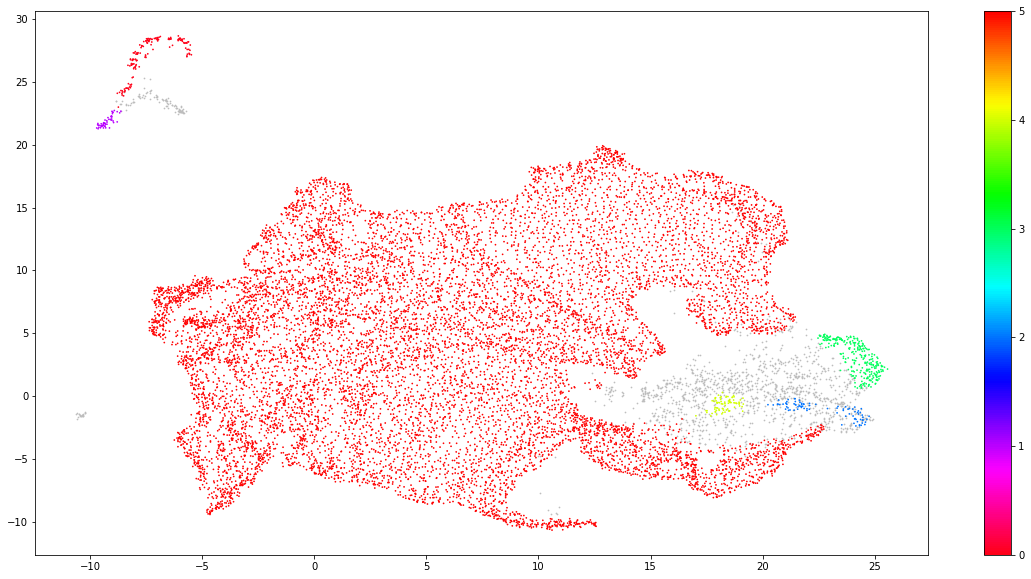

In [16]:
%%time
import umap

import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=150, n_components=2, min_dist=0.9).fit_transform(vec)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
data['labels'] = cluster.labels_
data['x']=result['x'].values
data['y']=result['y'].values
# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = data.loc[data.labels == -1, :]
clustered = data.loc[data.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.5)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.5, cmap='hsv_r')
plt.colorbar()

In [17]:
data

rains_1  rains_2  rains_3  rains_4  rains_5  rains_6  \
h3-7                                                                    
872d09248ffffff      176      121      107      102       89       94   
872d0924bffffff      175      120      107      102       88       95   
872d09269ffffff    65535    65535    65535    65535    65535    65535   
872d0926dffffff      173      119      106      100       84       91   
872d421a4ffffff       38       29       31       46       54       69   
...                  ...      ...      ...      ...      ...      ...   
872d76af2ffffff       36       32       32       31       33       43   
872d76af3ffffff       37       33       32       31       34       44   
872d76af4ffffff       35       31       31       31       31       43   
872d76af5ffffff       35       31       30       30       31       43   
872d76af6ffffff       36       32       32       31       32       43   

                 rains_7  rains_8  rains_9  rains_10  rains_11  rains_12  \
h3-7                                                                       
872d09248ffffff       92      111      121       131       175       213   
872d0924bffffff       94      113      122       133       175       211   
872d09269ffffff    65535    65535    65535     65535     65535     65535   
872d0926dffffff       88      109      118       128       169       211   
872d421a4ffffff       57       47       42        42        46        47   
...                  ...      ...      ...       ...       ...       ...   
872d76af2ffffff       33       38       34        32        43        47   
872d76af3ffffff       33       38       35        32        44        47   
872d76af4ffffff       32       37       33        31        42        45   
872d76af5ffffff       32       37       33        31        42        46   
872d76af6ffffff       33       37       34        32        42        46   

                    heights  texture  sunny_days  labels          x          y  
h3-7                                                                            
872d09248ffffff  131.987213        6         149      -1  20.947071   0.210474  
872d0924bffffff  303.310638        6         149      -1  23.736307  -1.631054  
872d09269ffffff  270.000000        6         146      -1  -6.772917  23.555305  
872d0926dffffff  229.304474        6         145      -1  22.335083  -0.828740  
872d421a4ffffff  360.000000        6         118       5  -0.254285  16.600382  
...                     ...      ...         ...     ...        ...        ...  
872d76af2ffffff  360.000000        6         158       5  12.352784 -10.061318  
872d76af3ffffff  360.000000        6         159       5  12.262139 -10.054071  
872d76af4ffffff  360.000000        6         158       5  12.556498 -10.083410  
872d76af5ffffff  360.000000        6         158       5  12.533231 -10.345465  
872d76af6ffffff  360.000000        6         158       5  12.441149 -10.148522  

[14010 rows x 18 columns]

In [18]:
#data=data[data['labels']>0]
data

rains_1  rains_2  rains_3  rains_4  rains_5  rains_6  \
h3-7                                                                    
872d09248ffffff      176      121      107      102       89       94   
872d0924bffffff      175      120      107      102       88       95   
872d09269ffffff    65535    65535    65535    65535    65535    65535   
872d0926dffffff      173      119      106      100       84       91   
872d421a4ffffff       38       29       31       46       54       69   
...                  ...      ...      ...      ...      ...      ...   
872d76af2ffffff       36       32       32       31       33       43   
872d76af3ffffff       37       33       32       31       34       44   
872d76af4ffffff       35       31       31       31       31       43   
872d76af5ffffff       35       31       30       30       31       43   
872d76af6ffffff       36       32       32       31       32       43   

                 rains_7  rains_8  rains_9  rains_10  rains_11  rains_12  \
h3-7                                                                       
872d09248ffffff       92      111      121       131       175       213   
872d0924bffffff       94      113      122       133       175       211   
872d09269ffffff    65535    65535    65535     65535     65535     65535   
872d0926dffffff       88      109      118       128       169       211   
872d421a4ffffff       57       47       42        42        46        47   
...                  ...      ...      ...       ...       ...       ...   
872d76af2ffffff       33       38       34        32        43        47   
872d76af3ffffff       33       38       35        32        44        47   
872d76af4ffffff       32       37       33        31        42        45   
872d76af5ffffff       32       37       33        31        42        46   
872d76af6ffffff       33       37       34        32        42        46   

                    heights  texture  sunny_days  labels          x          y  
h3-7                                                                            
872d09248ffffff  131.987213        6         149      -1  20.947071   0.210474  
872d0924bffffff  303.310638        6         149      -1  23.736307  -1.631054  
872d09269ffffff  270.000000        6         146      -1  -6.772917  23.555305  
872d0926dffffff  229.304474        6         145      -1  22.335083  -0.828740  
872d421a4ffffff  360.000000        6         118       5  -0.254285  16.600382  
...                     ...      ...         ...     ...        ...        ...  
872d76af2ffffff  360.000000        6         158       5  12.352784 -10.061318  
872d76af3ffffff  360.000000        6         159       5  12.262139 -10.054071  
872d76af4ffffff  360.000000        6         158       5  12.556498 -10.083410  
872d76af5ffffff  360.000000        6         158       5  12.533231 -10.345465  
872d76af6ffffff  360.000000        6         158       5  12.441149 -10.148522  

[14010 rows x 18 columns]

In [19]:
from colour import Color
white = Color("#ffff00")
colors = list(white.range_to(Color("#00ffff"),101))
data['color']=''

for i in data.index:
    data['color'].loc[i]=str(colors[int(data['labels'].loc[i]/data['labels'].max()*100)])
data

/root/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


rains_1  rains_2  rains_3  rains_4  rains_5  rains_6  \
h3-7                                                                    
872d09248ffffff      176      121      107      102       89       94   
872d0924bffffff      175      120      107      102       88       95   
872d09269ffffff    65535    65535    65535    65535    65535    65535   
872d0926dffffff      173      119      106      100       84       91   
872d421a4ffffff       38       29       31       46       54       69   
...                  ...      ...      ...      ...      ...      ...   
872d76af2ffffff       36       32       32       31       33       43   
872d76af3ffffff       37       33       32       31       34       44   
872d76af4ffffff       35       31       31       31       31       43   
872d76af5ffffff       35       31       30       30       31       43   
872d76af6ffffff       36       32       32       31       32       43   

                 rains_7  rains_8  rains_9  rains_10  rains_11  rains_12  \
h3-7                                                                       
872d09248ffffff       92      111      121       131       175       213   
872d0924bffffff       94      113      122       133       175       211   
872d09269ffffff    65535    65535    65535     65535     65535     65535   
872d0926dffffff       88      109      118       128       169       211   
872d421a4ffffff       57       47       42        42        46        47   
...                  ...      ...      ...       ...       ...       ...   
872d76af2ffffff       33       38       34        32        43        47   
872d76af3ffffff       33       38       35        32        44        47   
872d76af4ffffff       32       37       33        31        42        45   
872d76af5ffffff       32       37       33        31        42        46   
872d76af6ffffff       33       37       34        32        42        46   

                    heights  texture  sunny_days  labels          x  \
h3-7                                                                  
872d09248ffffff  131.987213        6         149      -1  20.947071   
872d0924bffffff  303.310638        6         149      -1  23.736307   
872d09269ffffff  270.000000        6         146      -1  -6.772917   
872d0926dffffff  229.304474        6         145      -1  22.335083   
872d421a4ffffff  360.000000        6         118       5  -0.254285   
...                     ...      ...         ...     ...        ...   
872d76af2ffffff  360.000000        6         158       5  12.352784   
872d76af3ffffff  360.000000        6         159       5  12.262139   
872d76af4ffffff  360.000000        6         158       5  12.556498   
872d76af5ffffff  360.000000        6         158       5  12.533231   
872d76af6ffffff  360.000000        6         158       5  12.441149   

                         y    color  
h3-7                                 
872d09248ffffff   0.210474  #00ff9e  
872d0924bffffff  -1.631054  #00ff9e  
872d09269ffffff  23.555305  #00ff9e  
872d0926dffffff  -0.828740  #00ff9e  
872d421a4ffffff  16.600382     cyan  
...                    ...      ...  
872d76af2ffffff -10.061318     cyan  
872d76af3ffffff -10.054071     cyan  
872d76af4ffffff -10.083410     cyan  
872d76af5ffffff -10.345465     cyan  
872d76af6ffffff -10.148522     cyan  

[14010 rows x 19 columns]

In [20]:
data

rains_1  rains_2  rains_3  rains_4  rains_5  rains_6  \
h3-7                                                                    
872d09248ffffff      176      121      107      102       89       94   
872d0924bffffff      175      120      107      102       88       95   
872d09269ffffff    65535    65535    65535    65535    65535    65535   
872d0926dffffff      173      119      106      100       84       91   
872d421a4ffffff       38       29       31       46       54       69   
...                  ...      ...      ...      ...      ...      ...   
872d76af2ffffff       36       32       32       31       33       43   
872d76af3ffffff       37       33       32       31       34       44   
872d76af4ffffff       35       31       31       31       31       43   
872d76af5ffffff       35       31       30       30       31       43   
872d76af6ffffff       36       32       32       31       32       43   

                 rains_7  rains_8  rains_9  rains_10  rains_11  rains_12  \
h3-7                                                                       
872d09248ffffff       92      111      121       131       175       213   
872d0924bffffff       94      113      122       133       175       211   
872d09269ffffff    65535    65535    65535     65535     65535     65535   
872d0926dffffff       88      109      118       128       169       211   
872d421a4ffffff       57       47       42        42        46        47   
...                  ...      ...      ...       ...       ...       ...   
872d76af2ffffff       33       38       34        32        43        47   
872d76af3ffffff       33       38       35        32        44        47   
872d76af4ffffff       32       37       33        31        42        45   
872d76af5ffffff       32       37       33        31        42        46   
872d76af6ffffff       33       37       34        32        42        46   

                    heights  texture  sunny_days  labels          x  \
h3-7                                                                  
872d09248ffffff  131.987213        6         149      -1  20.947071   
872d0924bffffff  303.310638        6         149      -1  23.736307   
872d09269ffffff  270.000000        6         146      -1  -6.772917   
872d0926dffffff  229.304474        6         145      -1  22.335083   
872d421a4ffffff  360.000000        6         118       5  -0.254285   
...                     ...      ...         ...     ...        ...   
872d76af2ffffff  360.000000        6         158       5  12.352784   
872d76af3ffffff  360.000000        6         159       5  12.262139   
872d76af4ffffff  360.000000        6         158       5  12.556498   
872d76af5ffffff  360.000000        6         158       5  12.533231   
872d76af6ffffff  360.000000        6         158       5  12.441149   

                         y    color  
h3-7                                 
872d09248ffffff   0.210474  #00ff9e  
872d0924bffffff  -1.631054  #00ff9e  
872d09269ffffff  23.555305  #00ff9e  
872d0926dffffff  -0.828740  #00ff9e  
872d421a4ffffff  16.600382     cyan  
...                    ...      ...  
872d76af2ffffff -10.061318     cyan  
872d76af3ffffff -10.054071     cyan  
872d76af4ffffff -10.083410     cyan  
872d76af5ffffff -10.345465     cyan  
872d76af6ffffff -10.148522     cyan  

[14010 rows x 19 columns]

In [21]:
data['labels'].value_counts()

 5    12030
-1     1347
 3      267
 0      153
 2       84
 4       77
 1       52
Name: labels, dtype: int64

In [22]:
data_=data[data['labels']==2]

In [23]:
%%time

V=[]
Heat=[]

#Создание карты
hmap = folium.Map(location=[45,39], zoom_start=10)



for i in data_.index: 

    polygon_geom = Polygon(h3.h3_to_geo_boundary(i, True)[:6])
    

    fillColor=data_['color'].loc[i]
    color=data_['color'].loc[i]

    
    list_h3='<br>1<br>'
      #+\                data[['timeIsoStr']][(data[h3_level]==data_count['h3'].loc[i])&(data['type']==t)][-5:].to_html(index=False,)


    folium.GeoJson(
          polygon_geom,
          style_function=lambda x,fillColor=fillColor, color=color: {
              "fillColor": fillColor,
              "color": "#000000",
              'weight' :0.3,
              'fillOpacity': 0.5 
          },
      ).add_child(folium.Popup(list_h3, min_width=500, max_width=500)).add_to(hmap)
    
    
    
display(hmap)

CPU times: user 203 ms, sys: 11.8 ms, total: 214 ms
Wall time: 213 ms


In [24]:
hmap.save('./map2.html')

In [25]:
result=data_.reset_index().reset_index()
result

index             h3-7  rains_1  rains_2  rains_3  rains_4  rains_5  \
0       0  872d54036ffffff      153      108       98       99      100   
1       1  872d54100ffffff      161      112      100       92       89   
2       2  872d54102ffffff      161      112      100       92       88   
3       3  872d54110ffffff      168      117      104       99       95   
4       4  872d54112ffffff      165      115      103      100       98   
..    ...              ...      ...      ...      ...      ...      ...   
79     79  872d56959ffffff      176      122      112      113      100   
80     80  872d5695bffffff      176      120      110      110       96   
81     81  872d5695dffffff      175      120      109      110       93   
82     82  872d56968ffffff      174      119      107      106       91   
83     83  872d5696bffffff      175      120      109      107       94   

    rains_6  rains_7  rains_8  ...  rains_10  rains_11  rains_12     heights  \
0       103       91      100  ...       120       169       191  204.567169   
1        95       85       96  ...       115       166       196  193.736267   
2        95       85       96  ...       115       166       196  186.115509   
3        99       88      101  ...       120       176       209  209.744888   
4       100       90      101  ...       117       175       205  249.842392   
..      ...      ...      ...  ...       ...       ...       ...         ...   
79      101      108      121  ...       153       191       209  313.264282   
80       98      108      121  ...       154       189       206  284.036255   
81       97      106      121  ...       152       185       205  315.000000   
82       94      102      118  ...       143       180       205  285.945404   
83       97      104      119  ...       145       184       206  267.709381   

    texture  sunny_days  labels          x         y  color  
0         9         120       2  21.433815 -0.214376   #3f0  
1         6         124       2  21.082560 -0.659996   #3f0  
2         6         124       2  21.082388 -0.450029   #3f0  
3         9         122       2  21.485788 -0.716380   #3f0  
4         9         122       2  22.085600 -1.056427   #3f0  
..      ...         ...     ...        ...       ...    ...  
79        6         151       2  24.359812 -1.309540   #3f0  
80        6         152       2  23.877705 -1.003517   #3f0  
81        6         151       2  24.279585 -1.439846   #3f0  
82        6         143       2  23.600914 -1.151374   #3f0  
83        6         142       2  23.363585 -0.833697   #3f0  

[84 rows x 21 columns]

In [26]:
result=data_.reset_index().reset_index()
result=result[['index','h3-7','color','labels']]
result['level_0']=result['index']
result.columns=[ "index","h3","color","val","level_0"]
result=result[["level_0","index","h3","val","color"]]
result

level_0  index               h3  val color
0         0      0  872d54036ffffff    2  #3f0
1         1      1  872d54100ffffff    2  #3f0
2         2      2  872d54102ffffff    2  #3f0
3         3      3  872d54110ffffff    2  #3f0
4         4      4  872d54112ffffff    2  #3f0
..      ...    ...              ...  ...   ...
79       79     79  872d56959ffffff    2  #3f0
80       80     80  872d5695bffffff    2  #3f0
81       81     81  872d5695dffffff    2  #3f0
82       82     82  872d56968ffffff    2  #3f0
83       83     83  872d5696bffffff    2  #3f0

[84 rows x 5 columns]

In [27]:
import json

result_json = result.to_json(orient='records')
parsed = json.loads(result_json)
out=json.dumps(parsed, indent=4)  
with open('all_lineV2-2.json', 'w') as f:
    f.write(out)